<a href="https://colab.research.google.com/github/TAlkam/-Probability-Stats-for-AI/blob/main/CDK_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploratory Data Analysis (EDA):**

Data Importing: First, we imported the necessary libraries and loaded the Chronic Kidney Disease (CKD) dataset using the pandas read_csv function.

Data Overview: We took an initial look at the dataset by printing out the first few rows using the head function. We also checked the basic information of the dataset such as the number of entries, the data types of each column, and the presence of missing values using the info function.

Data Preprocessing for EDA: We found that two columns ('sg' and 'grf') contained a mixture of numeric ranges (e.g., '1.009 - 1.011'), discrete values, and greater than or equal to values (e.g., '≥ 227.944'). We created a function to handle these special cases. If a value is 'discrete' or NaN, we converted it to NaN. If a value contains a '-', we calculated the average of the two numbers. For values with '≥', we simply removed this symbol and kept the number. We applied this function to 'sg' and 'grf' columns to create new columns 'avg_sg' and 'avg_grf'.

Descriptive Statistics: We used the describe function to obtain descriptive statistics for the numeric columns in the dataset, including count, mean, standard deviation, minimum, 25%, 50%, 75% quantiles, and maximum.

Data Visualization: We visualized the distribution of CKD and non-CKD patients using a bar plot. This helped us understand the balance of the target classes in our dataset.

**Abbreviations :**

bp (Diastolic): Diastolic blood pressure
bp limit: The limit of blood pressure
sg: Specific gravity (a urine test)
al: Albumin ( in urine)
rbc: Red blood cells
su: Sugar
pc: Pus cell
pcc: Pus cell clumps
ba: Bacteria
bgr: Blood glucose random
bu: Blood urea
sod: Sodium
sc: Serum creatinine
pot: Potassium
hemo: Hemoglobin
pcv: Packed cell volume
rbcc: Red blood cell count
wbcc: White blood cell count
htn: Hypertension
dm: Diabetes mellitus
cad: Coronary artery disease
appet: Appetite
pe: Pedal edema
ane: Anemia
grf: Glomerular filtration rate
stage: Stage of kidney disease
affected: If the patient is affected by CKD or not
age: Age of the patient



In [ ]:
from google.colab import files

uploaded = files.upload()



Saving ckd-dataset-v2 (2).csv to ckd-dataset-v2 (2).csv


  bp (Diastolic)  bp limit        al  class       rbc        su        pc  \
0       discrete  discrete  discrete    NaN  discrete  discrete  discrete   
1            NaN       NaN       NaN    NaN       NaN       NaN       NaN   
2              0         0     1 - 1    1.0         0       < 0         0   
3              0         0       < 0    1.0         0       < 0         0   
4              0         0       ≥ 4    1.0         1       < 0         1   

        pcc        ba        bgr  ...        dm       cad     appet        pe  \
0  discrete  discrete   discrete  ...  discrete  discrete  discrete  discrete   
1       NaN       NaN        NaN  ...       NaN       NaN       NaN       NaN   
2         0         0      < 112  ...         0         0         0         0   
3         0         0  112 - 154  ...         0         0         0         0   
4         0         1      < 112  ...         0         0         1         0   

        ane     stage  affected       age avg_sg  

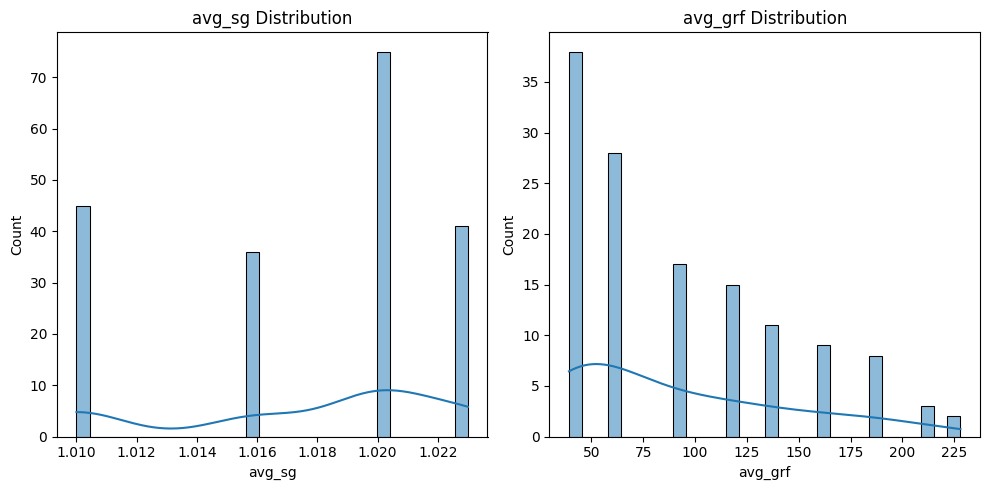

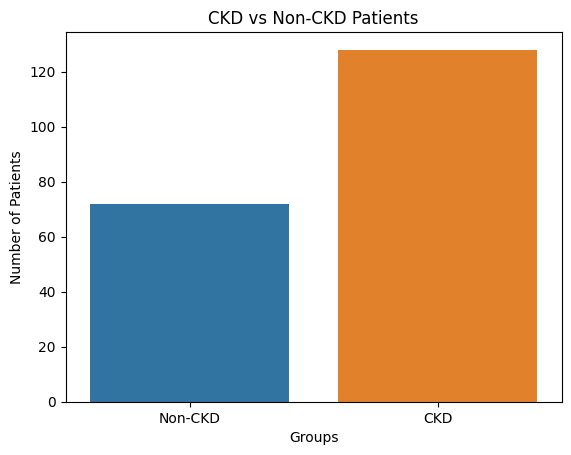

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Load the data
df = pd.read_csv('ckd-dataset-v2 (2).csv')

# Define a function to process 'sg' and 'grf' columns
def process_column(col):
    if isinstance(col, float):
        if pd.isnull(col):
            return np.nan
    else:
        if 'discrete' in col:
            return np.nan
        elif '-' in col:
            return np.mean(list(map(float, col.split(' - '))))
        elif '≥' in col:
            return float(col[2:])
        else:
            try:
                return float(col)
            except:
                return np.nan

# Apply the function to 'sg' and 'grf' columns
df['avg_sg'] = df['sg'].apply(process_column)
df['avg_grf'] = df['grf'].apply(process_column)

# Drop the original 'sg' and 'grf' columns
df.drop(['sg', 'grf'], axis=1, inplace=True)

# Convert 'class' column to binary format
df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

# Check the first few rows of the processed data
print(df.head())

# Print the basic information about the dataset
print(df.info())

# Plot histograms for 'avg_sg' and 'avg_grf' columns
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['avg_sg'].dropna(), bins=30, kde=True)
plt.title('avg_sg Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['avg_grf'].dropna(), bins=30, kde=True)
plt.title('avg_grf Distribution')

plt.tight_layout()
plt.show()

sns.countplot(x='class', data=df)
plt.title('CKD vs Non-CKD Patients')
plt.xlabel('Groups')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Non-CKD', 'CKD'])
plt.show()


In [ ]:
# Remove rows where 'class' is NaN
df = df.dropna(subset=['class'])


In [ ]:
# Replace NaN values in 'class' with a specific value (e.g., -1)
df['class'].fillna(-1, inplace=True)


In [ ]:
# Define your features and target
X = df.drop('class', axis=1)
y = df['class']

# Ensure there's no NaN in the target
assert y.isnull().sum() == 0

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


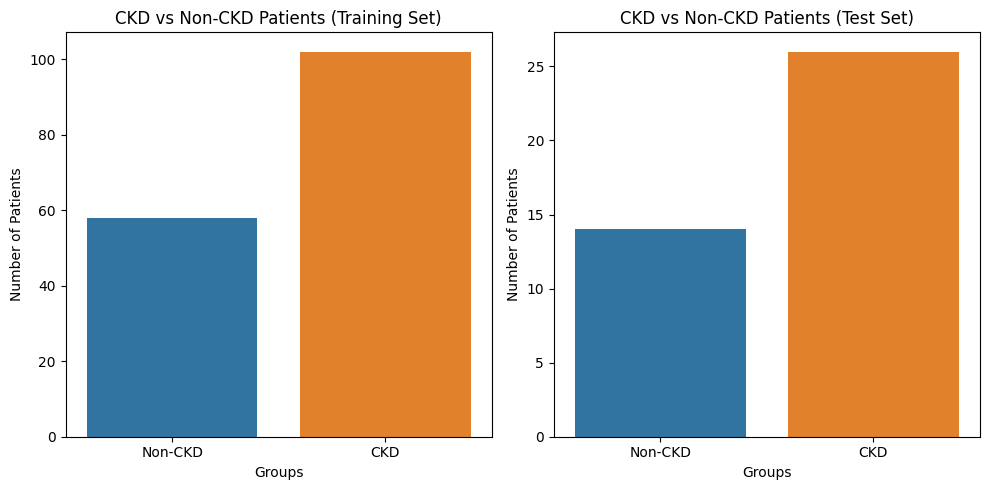

In [ ]:
from sklearn.model_selection import train_test_split

# Assume 'class' is the target and rest of the columns are features
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Convert y_train and y_test to DataFrames for easier plotting
y_train_df = pd.DataFrame(y_train, columns=['class'])
y_test_df = pd.DataFrame(y_test, columns=['class'])

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Count plot for 'class' column in the training set
sns.countplot(x='class', data=y_train_df, ax=axs[0])
axs[0].set_title('CKD vs Non-CKD Patients (Training Set)')
axs[0].set_xlabel('Groups')
axs[0].set_ylabel('Number of Patients')
axs[0].set_xticklabels(['Non-CKD', 'CKD'])

# Count plot for 'class' column in the test set
sns.countplot(x='class', data=y_test_df, ax=axs[1])
axs[1].set_title('CKD vs Non-CKD Patients (Test Set)')
axs[1].set_xlabel('Groups')
axs[1].set_ylabel('Number of Patients')
axs[1].set_xticklabels(['Non-CKD', 'CKD'])

plt.tight_layout()
plt.show()
